In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from text_models import TextClassifier, extract_text_blocks
%load_ext autoreload
%autoreload 2

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Load Dataset 

In [3]:
df = pickle.load( open( "gdr_assignment_labelled.pkl", "rb" ))

# Train LSTM

In [ ]:
model_lstm = TextClassifier()

X, y = model_lstm.tokenize_data(df['pp_sent'].values, df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_lstm = model_lstm.train_LSTM(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4032/4824 [========================>.....] - ETA: 2s - loss: 0.4686 - categorical_accuracy: 0.1275

In [21]:
test_loss, test_acc = model_lstm.evaluate(X_test,y_test, 'LSTM')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 2s 631us/sample - loss: 0.1011 - categorical_accuracy: 0.8818
Test Loss: 0.10112351296526013
Test Accuracy: 0.8818181753158569


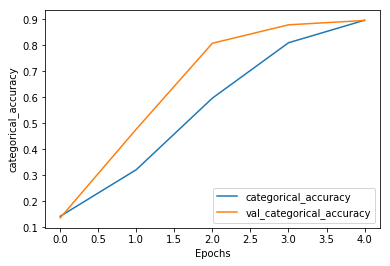

In [22]:
plot_graphs(history_lstm, 'categorical_accuracy')

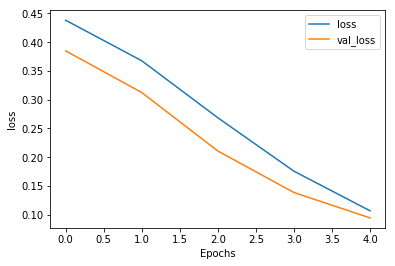

In [23]:
plot_graphs(history_lstm, 'loss')

# Train CNN

In [11]:
model_cnn = TextClassifier()

X, y = model_cnn.tokenize_data(df['pp_sent'].values, df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_cnn = model_cnn.train_CNN(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 2s 409us/sample - loss: 0.4368 - categorical_accuracy: 0.2102 - val_loss: 0.3595 - val_categorical_accuracy: 0.5112
Epoch 2/5
4824/4824 [==============================] - 2s 364us/sample - loss: 0.2597 - categorical_accuracy: 0.7562 - val_loss: 0.1371 - val_categorical_accuracy: 0.8937
Epoch 3/5
4824/4824 [==============================] - 2s 368us/sample - loss: 0.0780 - categorical_accuracy: 0.9210 - val_loss: 0.0547 - val_categorical_accuracy: 0.9403
Epoch 4/5
4824/4824 [==============================] - 2s 391us/sample - loss: 0.0336 - categorical_accuracy: 0.9509 - val_loss: 0.0355 - val_categorical_accuracy: 0.9534
Epoch 5/5
4824/4824 [==============================] - 2s 381us/sample - loss: 0.0189 - categorical_accuracy: 0.9602 - val_loss: 0.0275 - val_categorical_accuracy: 0.9646


In [12]:
test_loss, test_acc = model_cnn.evaluate(X_test,y_test, 'CNN')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 93us/sample - loss: 0.0305 - categorical_accuracy: 0.9481
Test Loss: 0.030494075482993415
Test Accuracy: 0.948106050491333


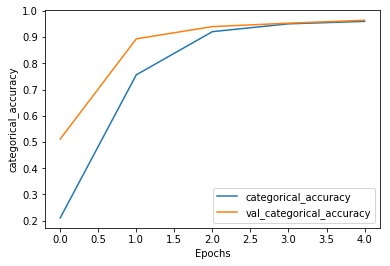

In [13]:
plot_graphs(history_cnn, 'categorical_accuracy')

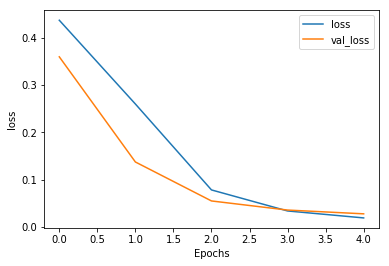

In [14]:
plot_graphs(history_cnn, 'loss')

# Train MLP

In [39]:
model_mlp = TextClassifier()

X, y = model_mlp.tokenize_data(df['pp_sent'].values, df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_mlp = model_mlp.train_MLP(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 1s 131us/sample - loss: 3.0898 - categorical_accuracy: 0.1374 - val_loss: 0.9998 - val_categorical_accuracy: 0.1754
Epoch 2/5
4824/4824 [==============================] - 0s 53us/sample - loss: 1.0320 - categorical_accuracy: 0.1636 - val_loss: 0.8393 - val_categorical_accuracy: 0.1903
Epoch 3/5
4824/4824 [==============================] - 0s 52us/sample - loss: 0.8340 - categorical_accuracy: 0.1667 - val_loss: 0.7425 - val_categorical_accuracy: 0.1903
Epoch 4/5
4824/4824 [==============================] - 0s 51us/sample - loss: 0.7254 - categorical_accuracy: 0.1559 - val_loss: 0.6530 - val_categorical_accuracy: 0.1381
Epoch 5/5
4824/4824 [==============================] - 0s 51us/sample - loss: 0.6399 - categorical_accuracy: 0.1368 - val_loss: 0.6048 - val_categorical_accuracy: 0.1362


In [16]:
test_loss, test_acc = model_mlp.evaluate(X_test,y_test, 'MLP')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 27us/sample - loss: 0.6231 - categorical_accuracy: 0.1409
Test Loss: 0.6230806917855234
Test Accuracy: 0.1409090906381607


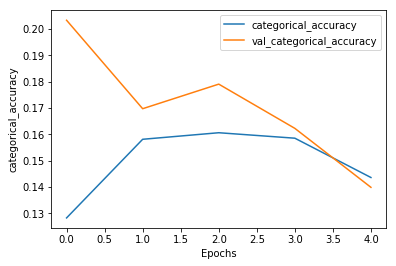

In [17]:
plot_graphs(history_mlp, 'categorical_accuracy')

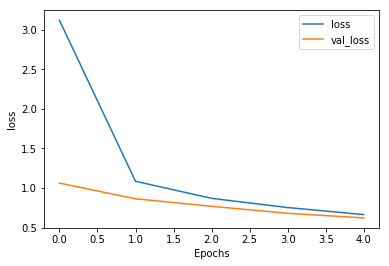

In [18]:
plot_graphs(history_mlp, 'loss')

In [44]:
def cross_validation(model_type, X_train, y_train):
    best_model = None
    learning_rates = np.linspace(1e-3, 5e-4, 1)
    regularization_strengths = np.linspace(0.001, 1.5, 1)

    best_val = -1.
    best_model = None

    for lr in learning_rates:
        for reg in regularization_strengths:
            # Train the network
            model = TextClassifier()
            history_mlp = model.train(X_train, y_train, model_type, learning_rate=lr, regularization=reg)
            history_mlp.history['categorical_accuracy']
            train_acc_history = history_mlp.history['categorical_accuracy']
            val_acc_history = history_mlp.history['val_categorical_accuracy']
            val_acc = val_acc_history[-1]

            if val_acc > best_val:
                best_val = val_acc
                best_model = model

            print('lr: %f, reg: %f, t_acc: %f, v_acc: %f.' % (lr, reg,  train_acc_history[-1], val_acc))

    print('Best Validation accuracy: ', best_val)
    return best_model

In [45]:
best_cnn = cross_validation("CNN", X_train, y_train)
best_mlp = cross_validation("MLP", X_train, y_train)
best_lstm = cross_validation("LSTM", X_train, y_train)

Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 2s 490us/sample - loss: 0.4447 - categorical_accuracy: 0.2384 - val_loss: 0.3520 - val_categorical_accuracy: 0.6101
Epoch 2/5
4824/4824 [==============================] - 2s 421us/sample - loss: 0.2436 - categorical_accuracy: 0.8035 - val_loss: 0.1238 - val_categorical_accuracy: 0.9011
Epoch 3/5
4824/4824 [==============================] - 2s 451us/sample - loss: 0.0712 - categorical_accuracy: 0.9233 - val_loss: 0.0523 - val_categorical_accuracy: 0.9422
Epoch 4/5
4824/4824 [==============================] - 2s 448us/sample - loss: 0.0325 - categorical_accuracy: 0.9467 - val_loss: 0.0353 - val_categorical_accuracy: 0.9571
Epoch 5/5
4824/4824 [==============================] - 2s 429us/sample - loss: 0.0186 - categorical_accuracy: 0.9625 - val_loss: 0.0283 - val_categorical_accuracy: 0.9552
lr: 0.001000, reg: 0.001000, t_acc: 0.962479, v_acc: 0.955224.
Best Validation accuracy:  0.955223

In [29]:
test_loss, test_acc = best_cnn.evaluate(X_test,y_test, 'CNN')
print('CNN: Test Loss: {}'.format(test_loss))
print('CNN: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_lstm.evaluate(X_test,y_test, 'LSTM')
print('LSTM: Test Loss: {}'.format(test_loss))
print('LSTM: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_mlp.evaluate(X_test,y_test, 'MLP')
print('MLP: Test Loss: {}'.format(test_loss))
print('MLP: Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 113us/sample - loss: 0.0309 - categorical_accuracy: 0.9462
CNN: Test Loss: 0.03088587409619129
CNN: Test Accuracy: 0.946212112903595
2640/2640 [==============================] - 2s 632us/sample - loss: 0.0788 - categorical_accuracy: 0.8841
LSTM: Test Loss: 0.07880551724722891
LSTM: Test Accuracy: 0.8840909004211426
2640/2640 [==============================] - 0s 41us/sample - loss: 0.4429 - categorical_accuracy: 0.1367
MLP: Test Loss: 0.44294877449671427
MLP: Test Accuracy: 0.13674242794513702


In [30]:
data_pros_cons = pickle.load( open( "gdr_assignment_pros_cons.pkl", "rb" ))
blocks = extract_text_blocks(data_pros_cons.iloc[10,0])

# Predict CNN

In [43]:
best_cnn.predict(blocks, model_name='CNN')

[(0.78494394,
  'Job Security/Advancement',
  'i worked for the internal marketing team (marcom) on the creative side'),
 (0.5378876,
  'culture_team',
  'the best thing about working at apple is your coworkers'),
 (0.75581646,
  'culture_team',
  'they do an excellent job of hiring incredibly intelligent'),
 (0.91630423, 'culture_team', 'talented people'),
 (0.7770939,
  'salary_benefits',
  'most of them are ego-free (about 70% of them) and will help you whenever possible'),
 (0.6011536, 'wlb_working_conditions', 'the work usually comes in waves'),
 (0.81726235,
  'wlb_working_conditions',
  'for weeks at a time you can expect late nights and no weekends'),
 (0.6052957, 'culture_team', "when it's slow"),
 (0.53223413, 'culture_team', "it's very slow"),
 (0.6749235,
  'wlb_working_conditions',
  'you can often work from home or take comp days'),
 (0.6156312,
  'wlb_working_conditions',
  'during downtimes it is not uncommon to go in for five hours including a long lunch and then go ho

# Predict LSTM

In [46]:
best_lstm.predict(blocks, model_name='LSTM')

AttributeError: 'NoneType' object has no attribute 'texts_to_sequences'

# Predict MLP

In [ ]:
model_mlp.predict(blocks, model_name='MLP')